# 12 Jan - Word2Vec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
len(corpus)

5220

In [5]:
#the corpus is already tokenized
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [6]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [7]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [8]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [9]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [10]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

In [11]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

print(word2index)

{'contemplated': 0, 'carolina': 1, 'humblest': 2, 'finer': 3, 'thousandth': 4, 'fraction': 5, 'entailing': 6, 'surveying': 7, 'lincoln': 8, 'warped': 9, 'usurp': 10, 'wind': 11, 'compromises': 12, 'riveted': 13, 'deliberation': 14, 'flows': 15, 'compete': 16, 'reliant': 17, 'knowledge': 18, 'dissemination': 19, 'obtain': 20, 'characterized': 21, 'unfolded': 22, 'constricted': 23, 'reliance': 24, 'establishment': 25, 'lurks': 26, 'proved': 27, 'memory': 28, 'pronounce': 29, 'incapable': 30, 'inviting': 31, 'income': 32, 'expedients': 33, 'stubbornness': 34, 'exactly': 35, 'pits': 36, 'entitled': 37, 'reduce': 38, 'investigations': 39, 'agreeably': 40, 'widen': 41, 'vary': 42, 'slaughtering': 43, 'news': 44, 'abuse': 45, 'record': 46, 'school': 47, 'maker': 48, 'ideal': 49, 'carelessly': 50, 'offense': 51, 'philippines': 52, 'entrusting': 53, 'difficulty': 54, 'rekindling': 55, 'supremacy': 56, 'calamity': 57, 'overburdened': 58, 'path': 59, 'bankrupt': 60, 'mindfulness': 61, 'overthrow'

In [12]:
#define vocab size
vocab_size = len(vocabs)
print(vocab_size)

9020


### 2. Preparing Traning Data

In [13]:
#random batch for Skip-gram model with generic window size and batch size
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[j]])
            for k in range(window_size):
                context.append(word2index[sentence[k + window_size + 1]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [14]:
#test the Skip-gram method with window size = 2 and batch size = 3
input_batch, target_batch = random_batch_skip_gram(2, 3)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[6485]
 [6634]
 [3198]]
Target:  [[2090]
 [8158]
 [7944]]


In [15]:
#random batch for CBOW model with generic window size and batch size
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[j]])
            for k in range(window_size):
                context.append(word2index[sentence[k + window_size + 1]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([cbow[i][0]])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [16]:
#test the CBOW method with window size = 2 and batch size = 3
input_batch, target_batch = random_batch_cbow(2, 3)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[[ 877 3548 5521 3385]]

 [[7487  155 3559 3231]]

 [[6816 1269  932 1132]]]
Target:  [[ 337]
 [8056]
 [4703]]


### 3. Skip-gram

#### 3.1. Model

In [17]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 3.2. Training

In [18]:
#set training parameters
window_size = 2
batch_size = 2
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#prepare all_vocabs tensor
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 8.597063 | time: 0m 35s
Epoch: 200 | cost: 7.883035 | time: 1m 10s
Epoch: 300 | cost: 13.255125 | time: 1m 44s
Epoch: 400 | cost: 9.137209 | time: 2m 19s
Epoch: 500 | cost: 9.971606 | time: 2m 54s


#### 3.3. Plotting the Embeddings

In [19]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['contemplated', 'carolina', 'humblest', 'finer', 'thousandth', 'fraction', 'entailing', 'surveying', 'lincoln', 'warped', 'usurp', 'wind', 'compromises', 'riveted', 'deliberation', 'flows', 'compete', 'reliant', 'knowledge', 'dissemination']


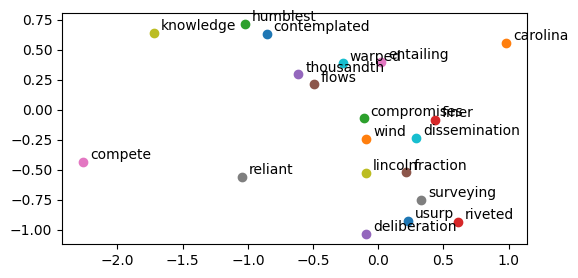

In [20]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 3.4. Cosine Similarity

In [27]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
people = get_embed('people')
men = get_embed('men')
nation = get_embed('nation')
country = get_embed('country')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"people vs. men: ", cos_sim(people, men))
print(f"nation vs. country: ", cos_sim(world, country))

liberty vs. freedom:  0.9318532224918233
people vs. men:  0.9993853807356525
nation vs. country:  0.9999721019396199


### 4. Skip-gram with Negative Sampling

#### 4.1. Unigram Distribution

In [22]:
Z = 0.001

from collections import Counter

word_count = Counter(flatten(corpus))
num_total_words = sum([c for w, c in word_count.items()])

unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

Counter(unigram_table)

NameError: name 'vocab' is not defined

#### 4.2. Negative Sampling

In [ ]:
import random

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

#test negative sampling
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

#### 4.3. Model

In [ ]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

#### 4.4. Training

In [ ]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

#### 4.5. Plotting the Embeddings

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.6. Cosine Similarity

### 5. CBOW

#### 5.1. Model

#### 5.2. Training

#### 5.3. Plotting the Embeddings

#### 5.4. Cosine Similarity